

## <font color='blue'>__Introducción a Dask__</font>

<p align="left">
  <img src="https://drive.google.com/uc?export=view&id=1dMtxB0ZTlUn095jGNE8f7y_HiIw6QakY" width="300">
</p>


Dask es una biblioteca de Python diseñada para facilitar el procesamiento paralelo y distribuido de grandes volúmenes de datos. Su principal objetivo es extender las herramientas del ecosistema científico de Python (como NumPy, Pandas o Scikit-learn) para que puedan manejar datasets que exceden la memoria del sistema o que requieren aceleración mediante múltiples núcleos o incluso clusters.

### __Historia__

Dask fue desarrollado por Matthew Rocklin y lanzado en 2015 como parte de un esfuerzo por llevar capacidades de big data al entorno de trabajo ya conocido por científicos de datos y analistas. Desde entonces, ha sido adoptado por numerosas instituciones y ha crecido hasta convertirse en un componente clave para análisis escalables en Python.

### __¿Para qué sirve?__
- Procesamiento de datos que no caben en memoria
- Aceleración de código usando múltiples núcleos o procesos
- Computación distribuida en clusters locales o en la nube
- Procesamiento perezoso (lazy evaluation) para optimizar flujos de trabajo
- Paralelización de tareas generales mediante programación diferida (dask.delayed)

### __¿Cuándo usar Dask?__

✅ Usar Dask cuando:
- Tus datasets son demasiado grandes para Pandas o NumPy.
- Tu código tarda demasiado en ejecutarse en un solo núcleo.
- Necesitas distribuir tareas en múltiples máquinas.
- Quieres mejorar tiempos de procesamiento sin cambiar de lenguaje.

❌ __Evitar Dask cuando:__
- Tus datasets caben cómodamente en memoria y Pandas es suficientemente rápido.
- Necesitas operaciones altamente especializadas que Dask aún no soporta completamente.
- El sobrecosto de gestionar computación distribuida supera los beneficios para tu caso.


El Colab, Dask viene preinstalado, veamos su versión.

In [ ]:
import dask
dask.__version__

'2024.12.1'

## <font color='blue'>__🧩 Componentes principales de Dask__</font>
Dask está compuesto por varios módulos que permiten abordar distintos tipos de datos y flujos de trabajo. Cada componente extiende una librería de Python conocida, pero adaptada a la ejecución paralela o distribuida.

1. `dask.arra`: Extiende numpy.ndarray para trabajar con grandes arreglos multidimensionales. Permite operaciones matemáticas y estadísticas usando chunks que se procesan en paralelo. Ideal para datos numéricos.

2. `dask.dataframe`:Extiende pandas.DataFrame y permite procesar grandes volúmenes de datos tabulares que no caben en memoria. Soporta operaciones comunes como groupby, merge, filter, y apply, ejecutadas por particiones.

3. `dask.bag`: Diseñado para procesar datos semi-estructurados o no estructurados (por ejemplo: logs, JSONs, texto plano). Similar a una lista de Python, pero particionada. Útil para cargas de trabajo tipo MapReduce.

4. `dask.delayed`: Permite convertir funciones Python normales en tareas diferidas (lazy), construyendo un grafo de dependencias que luego puede ejecutarse en paralelo. Muy útil para flujos de trabajo personalizados o no vectorizables.

5. `dask.distributed`: Es el scheduler avanzado de Dask. Permite ejecutar los grafos de tareas en múltiples hilos, procesos o incluso clusters distribuidos (locales o en la nube). También ofrece un panel web interactivo de monitoreo.

## <font color='blue'>__🔢 Dask Arrays__</font>


`dask.arra` proporciona una interfaz similar a `numpy.ndarray`, pero diseñada para trabajar con datos distribuidos en chunks y ejecutar operaciones en paralelo o fuera de memoria.

Características principales:
- Compatible con muchas operaciones de NumPy (suma, media, slicing, reshape, etc.).
- Trabaja de forma “perezosa” (lazy): no ejecuta hasta que se llama a `.compute()`.
- Ideal para datos numéricos grandes que no caben en memoria RAM.

In [2]:
import numpy as np
import dask.array as da

dask_arr = da.random.randint(20, size=20, chunks=5)

In [ ]:
np.random.randint(20, size=20)

array([13,  1,  2,  5,  6,  4, 13, 18, 15, 12,  1, 14,  5, 16, 11,  2,  5,
        7,  1,  2])

In [ ]:
print(dask_arr)           # Lazy execution

dask.array<randint, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>


In [ ]:
print(dask_arr.compute()) # Trigger computation

[15 19  2  4 15  6  8 18  7 14 12  8  8  7  6 12  5 14 15 14]


In [ ]:
# Inspeccionamos los chunks
dask_arr.chunks

((5, 5, 5, 5),)

Podemos crear arreglos Dask de varias formas:

In [ ]:
np_arr = np.random.randint(20, size=200)
dask_arr = da.from_array(np_arr, chunks=5) # chunks indica el tamaño no la cantidad
dask_arr

dask.array<array, shape=(200,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

### __Operaciones escalares y reducciones__
Dask permite realizar operaciones similares a NumPy de forma paralela:

In [ ]:
# Arreglo aleatorio entero
rand_arr = da.random.randint(0, 10, size=20, chunks=5)

# Suma escalar
sumado = rand_arr + 10

# Reducción: suma total
suma_total = rand_arr.sum()

# Media
media = rand_arr.mean()

# Recordemos que la ejecución es lazy
print(suma_total)
print(media)

dask.array<sum-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>
dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


In [ ]:
print(suma_total.compute())
print(media.compute())

112
5.6


In [ ]:
sumado

dask.array<add, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [ ]:
sumado.compute()

array([16, 11, 12, 19, 19, 12, 16, 15, 19, 16, 12, 19, 19, 14, 15, 18, 14,
       10, 19, 17])

In [ ]:
(rand_arr + 100).compute()

array([106, 101, 102, 109, 109, 102, 106, 105, 109, 106, 102, 109, 109,
       104, 105, 108, 104, 100, 109, 107])

__Slicing__

También podemos hacer cortes y seleccionar partes del arreglo:

In [ ]:
rand_arr[5:10].compute()

array([2, 6, 5, 9, 6])

__Broadcasting__

Dask soporta operaciones entre arreglos compatibles en forma:

In [ ]:
arr1 = da.ones(4, chunks=2)
arr2 = da.full_like(arr1, 10) # La función da.full_like(array, fill_value) crea un nuevo arreglo Dask del mismo tamaño
                              # y chunks que el original, pero con todos los elementos igual a fill_value.
resultado = arr1 + arr2

print(resultado.compute())

[11. 11. 11. 11.]


__Reshape, Stack y Concatenate__

In [ ]:
np.arange(16)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
matriz = da.arange(16, chunks=4)
matriz

dask.array<arange, shape=(16,), dtype=int64, chunksize=(4,), chunktype=numpy.ndarray>

In [ ]:
matriz.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
matriz.shape

(16,)

In [ ]:
# reshape
matriz = matriz.reshape((4, 4))
print(matriz.compute())

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [ ]:
matriz.shape

(4, 4)

In [ ]:
# Stack: como la función `stack` en numpy, deben ser del mismo tamaño. Crea una dimensión adicional.
stacked = da.stack([matriz, matriz + 10])
print(stacked.compute())

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[10 11 12 13]
  [14 15 16 17]
  [18 19 20 21]
  [22 23 24 25]]]


In [ ]:
stacked.shape

(2, 4, 4)

In [ ]:
stacked_2 = da.stack([matriz, matriz + 10], axis=1)
print(stacked_2.compute())

[[[ 0  1  2  3]
  [10 11 12 13]]

 [[ 4  5  6  7]
  [14 15 16 17]]

 [[ 8  9 10 11]
  [18 19 20 21]]

 [[12 13 14 15]
  [22 23 24 25]]]


In [ ]:
stacked_2.shape

(4, 2, 4)

In [ ]:
# Concatenación vertical
concatenado = da.concatenate([matriz, matriz + 10], axis=0)
print(concatenado.compute())

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [10 11 12 13]
 [14 15 16 17]
 [18 19 20 21]
 [22 23 24 25]]


In [ ]:
concatenado.shape

(8, 4)

## <font color='blue'>__🕸️ Visualización de grafos de tareas en Dask__</font>

Una de las herramientas más poderosas de Dask es su capacidad para mostrar el grafo de tareas asociado a una operación. Esto permite entender cómo se descomponen y programan las operaciones para su ejecución en paralelo.

Cada nodo representa una operación o dato, y las flechas indican dependencias entre tareas.

In [ ]:
np.ones(4).sum()

np.float64(4.0)

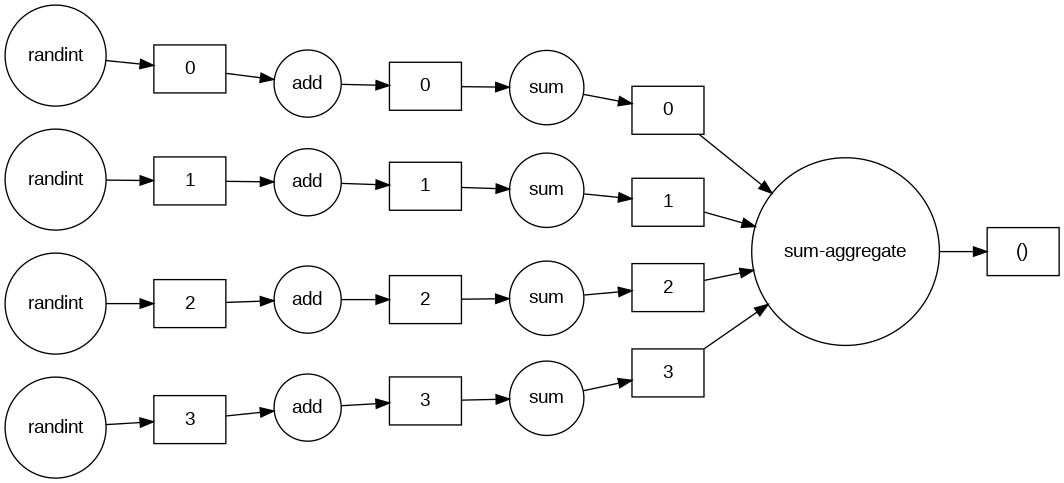

In [ ]:
# Crear un arreglo simple
arr = da.random.randint(0, 10, size=20, chunks=5)

# Realizar una operación compuesta
resultado = (arr + 1).sum()

# Visualizar el grafo de tareas
resultado.visualize(rankdir="LR")

Cada vez que realizamos una operación con Dask, no se ejecuta inmediatamente. En su lugar, Dask construye un grafo de tareas, conocido formalmente como un __DAG__ (Directed Acyclic Graph, o Grafo Acíclico Dirigido).
Un DAG es una estructura de datos que representa tareas como nodos, y las dependencias entre ellas como aristas dirigidas.
- Dirigido significa que cada conexión entre tareas tiene un orden específico (de una tarea a otra).
- Acíclico significa que no hay ciclos: no puedes volver al mismo nodo a través de las conexiones.

En otras palabras, un DAG representa un flujo de trabajo que tiene un inicio y un fin, sin repeticiones ni bucles.


¿Qué representa cada elemento del grafo?

- Círculos grandes: funciones o tareas computacionales (add, sum, randint, etc.).
- Rectángulos: resultados intermedios o datos.
- Conexiones: relaciones de dependencia. Una tarea depende de la salida de otra.
- Nodo final: la operación global que recoge todas las sub-tareas (como sum-aggregate).

¿Por qué es útil visualizar el DAG?
- Permite entender cómo Dask dividirá y ejecutará las tareas.
- Muestra cómo se paraleliza una operación compleja.
- Ayuda a optimizar el diseño del flujo de trabajo.
- Es clave para depurar errores o cuellos de botella.

In [ ]:
# Hasta el momento no se ha ejecutado nada
resultado

dask.array<sum-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>

In [ ]:
print(resultado.compute())

98


El grafo está asociado al objeto `resultado`. Cuando ejecutamos:

```python
resultado.compute()
```

Dask ejecuta el grafo, realiza los cálculos, y devuelve un valor NumPy (por ejemplo, un escalar). Pero el objeto `resultado` sigue siendo un arreglo Dask con su grafo de tareas intacto. No se “marca como computado”.

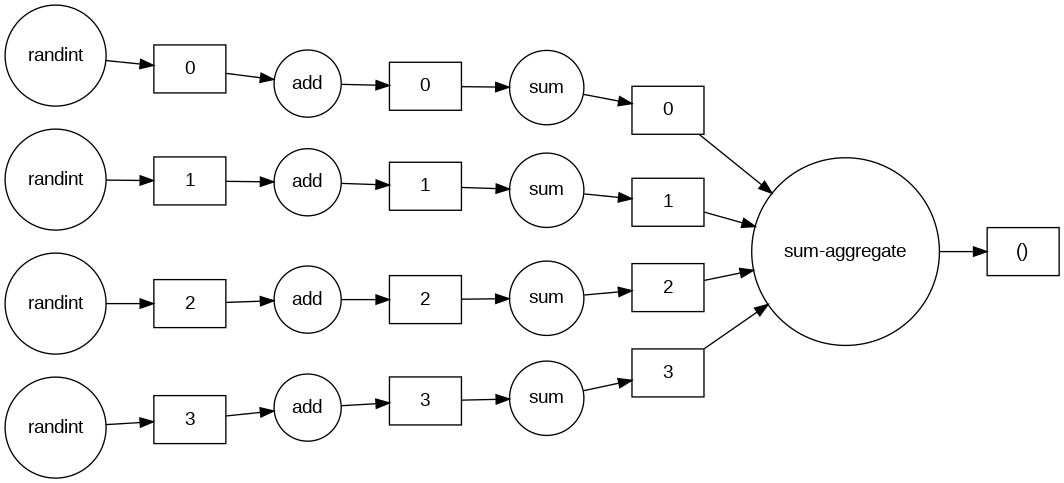

In [ ]:
resultado.visualize(rankdir="LR")

Veamos otro ejemplo más complejo:

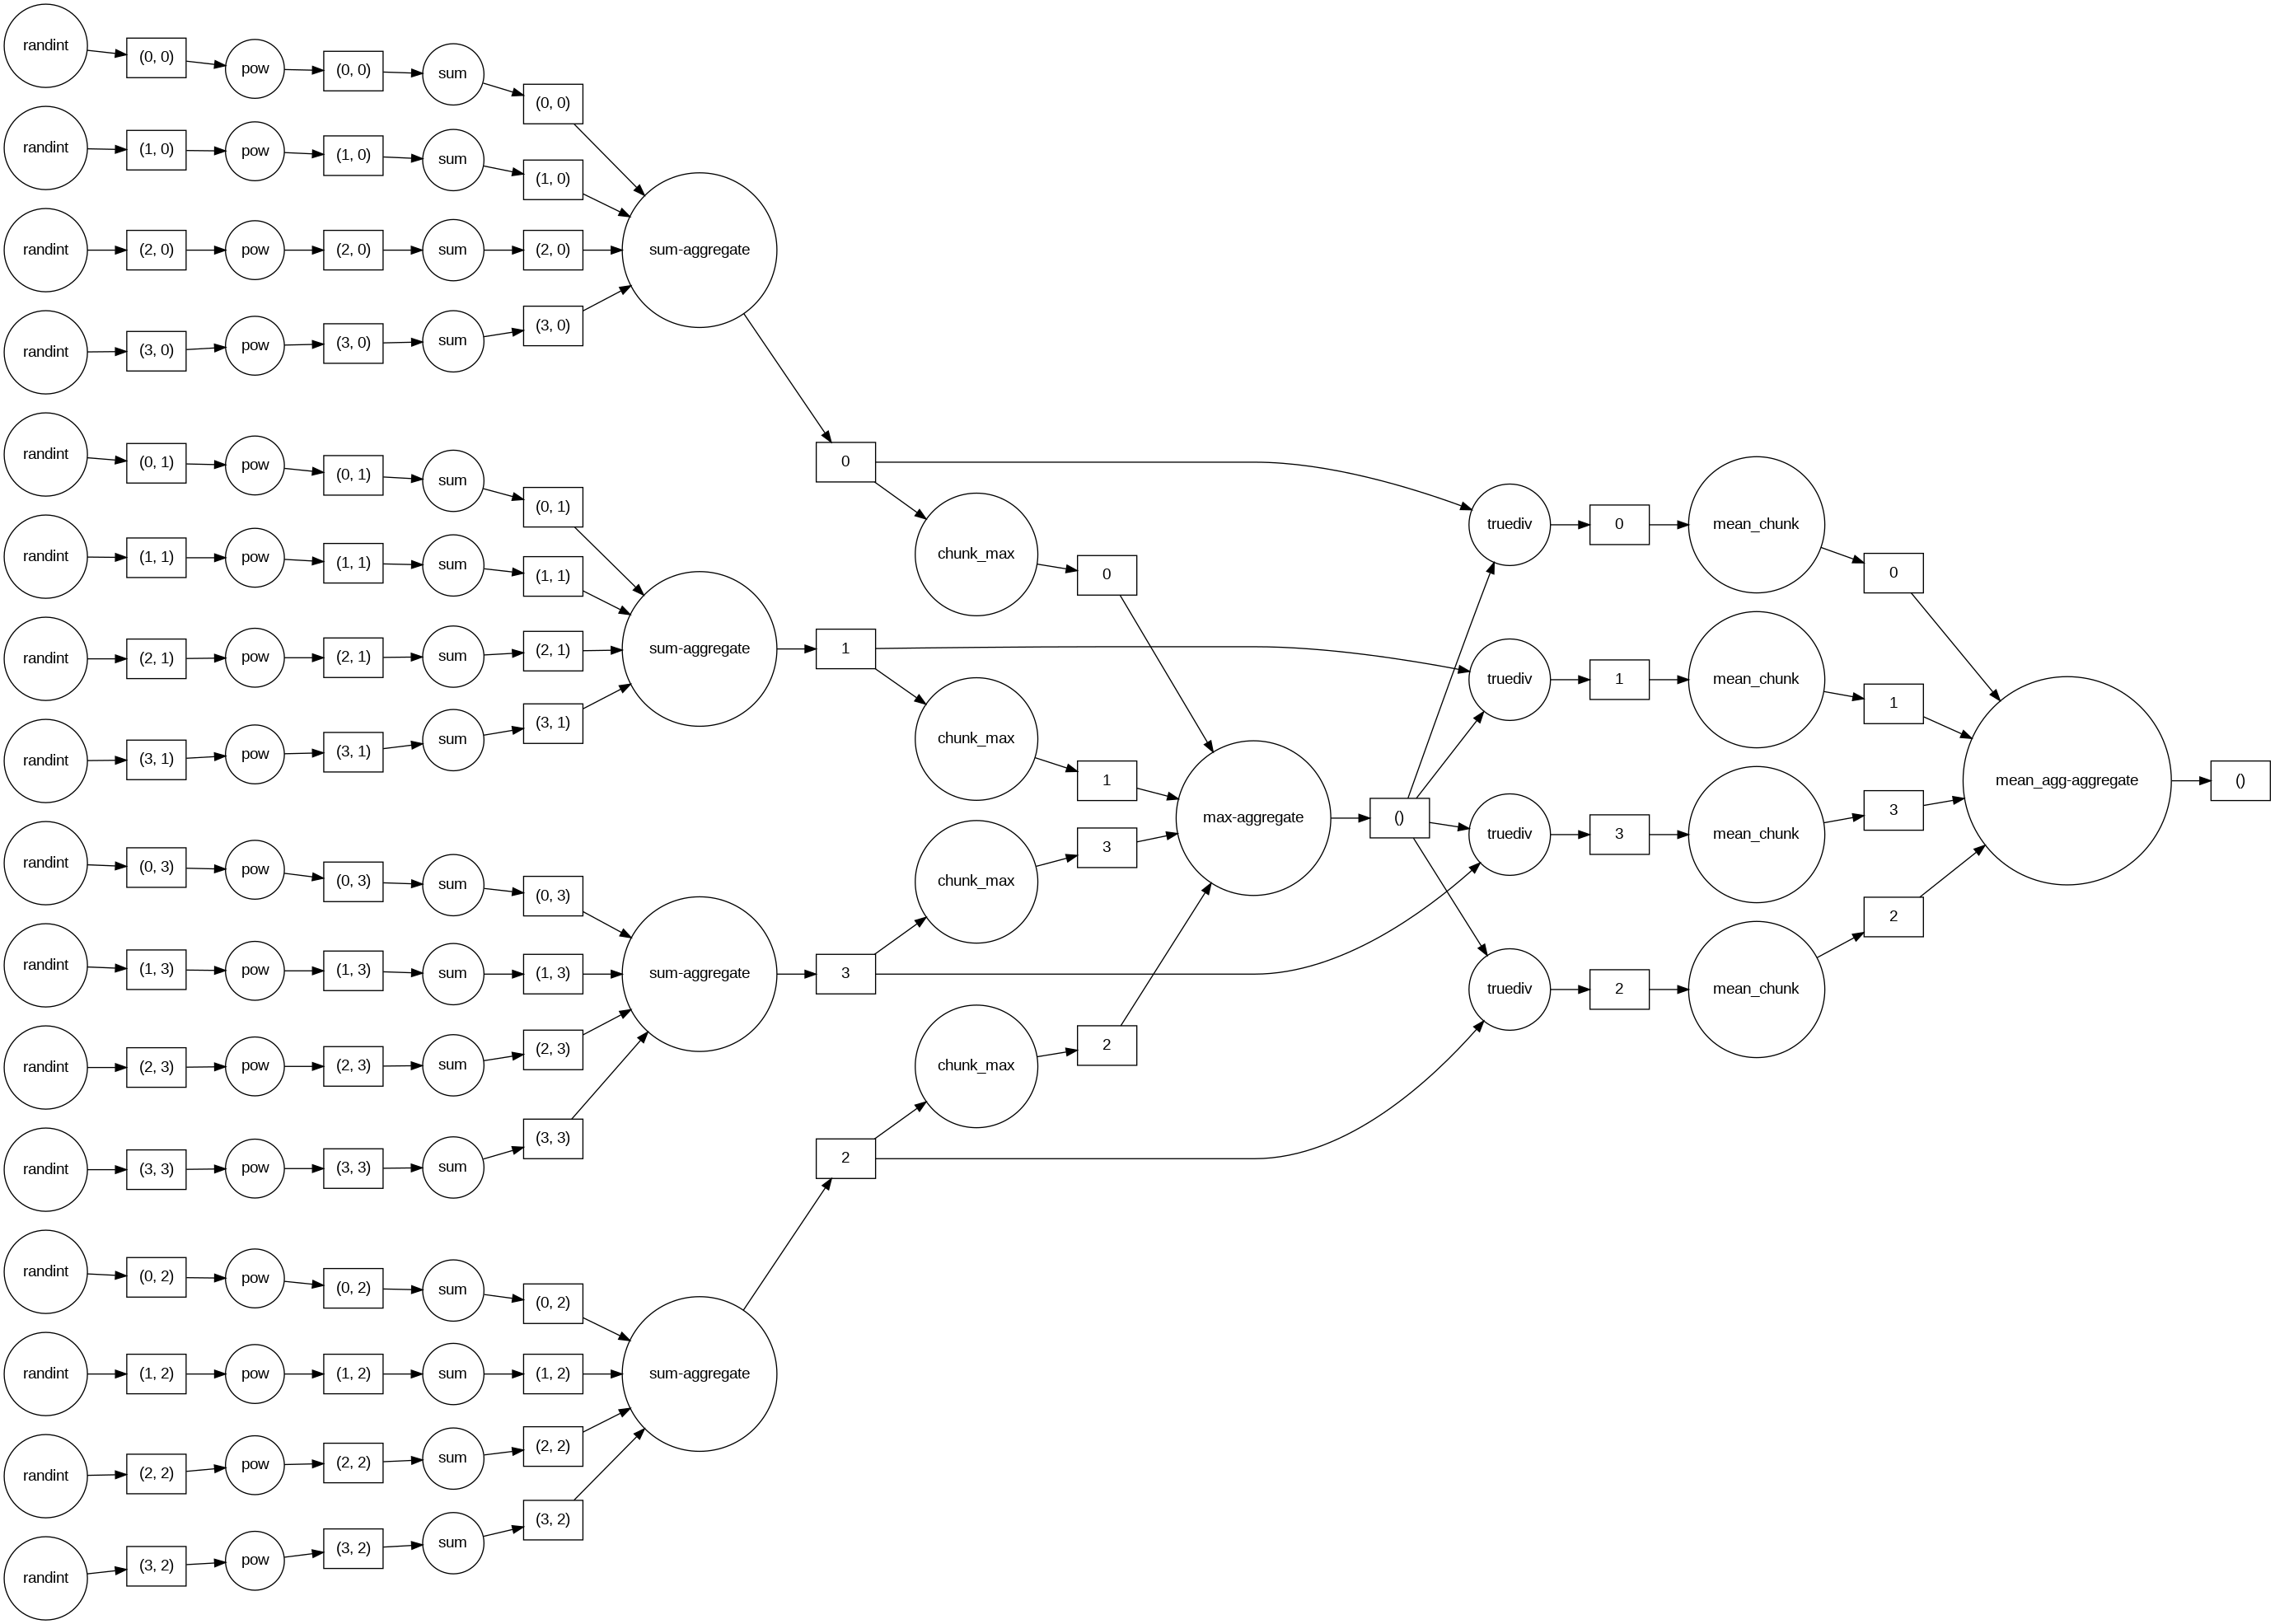

In [ ]:
# Crear un arreglo grande con valores entre 0 y 100
arr = da.random.randint(0, 100, size=(1000, 1000), chunks=(250, 250))

# Paso 1: Elevar al cuadrado
arr_squared = arr ** 2

# Paso 2: Sumar por columnas (axis=0)
suma_columnas = arr_squared.sum(axis=0)

# Paso 3: Normalizar (dividir por el máximo valor de cada columna)
max_col = suma_columnas.max()
arr_normalizado = suma_columnas / max_col

# Paso 4: Promediar el resultado final
promedio_final = arr_normalizado.mean()

# Visualizar el grafo de tareas
promedio_final.visualize(rankdir="LR")

Acá vemos:
- Múltiples bloques de procesamiento independientes (por cada chunk de entrada).
- Encadenamiento de operaciones: **2 → sum → max → división → mean.
- Un grafo más profundo, con múltiples capas de dependencias entre tareas.

In [ ]:
# Cuántas tareas tiene el grafo:
print(len(promedio_final.dask))

66


## <font color='blue'>__🧠 Computación fuera de memoria (Out-of-Memory Computation)__</font>


Una de las principales ventajas de Dask es su capacidad de trabajar con datos que no caben en la memoria RAM. Gracias a su ejecución por chunks y su evaluación perezosa, Dask procesa los datos por partes y solo cuando es necesario.

Esto permite realizar cálculos sobre arreglos o datasets que ocuparían decenas o cientos de gigabytes, algo imposible con NumPy o Pandas en un entorno tradicional.


A continuación creamos un arreglo de tamaño 50,000 × 50,000 (≈20 GB) y calculamos su suma total. Este ejemplo simula un escenario real de análisis de grandes volúmenes de datos, como imágenes satelitales, matrices dispersas o sensores industriales.

In [3]:
# Crear un arreglo gigante: 50,000 x 50,000 elementos enteros
# Dividido en chunks manejables: 5,000 x 1,000
arr = da.random.randint(0, 10000, size=(50000, 50000), chunks=(5000, 1000))

# Mostrar el tamaño total del arreglo en GB
print(f"Tamaño del arreglo: {arr.nbytes / 1e9:.1f} GB")

# Calcular la suma total (no se ejecuta hasta que se llama a .compute())
suma_total = arr.sum()
print("Resultado:", suma_total.compute())

Tamaño del arreglo: 20.0 GB
Resultado: 12498638528465


Consideraciones
- A mayor tamaño de los chunks, menor sobrecarga de tareas, pero mayor uso de memoria.
- A menor tamaño, más granularidad y paralelismo, pero más sobrecarga en el scheduler.
- Dask puede usar disco como espacio temporal si se configura un scheduler con soporte (como dask.distributed).

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.528611 to fit


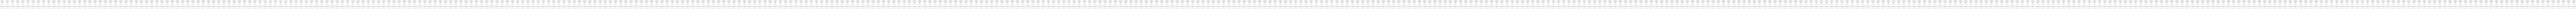

In [5]:
# Visualize no funcionará porque el DAG es muy grande
arr.visualize()

Dask usa por defecto `graphviz` + `cairo` (backend de renderización) para renderizar en bitmap (PNG) dentro del notebook, y eso tiene límites de resolución. Si el grafo es muy grande (muchos nodos o conexiones), el motor de rendering (cairo) lanza la excepción.

Con la siguiente instrucción, Dask genera un archivo SVG (gráfico vectorial) que no depende del límite de resolución del backend cairo —el responsable del mensaje de advertencia—, puede escalarse sin pérdida de calidad por ser un formato vectorial, y además es compatible con Google Colab, que puede renderizar archivos SVG directamente en la salida del notebook, permitiendo visualizar el grafo incluso cuando es muy grande.


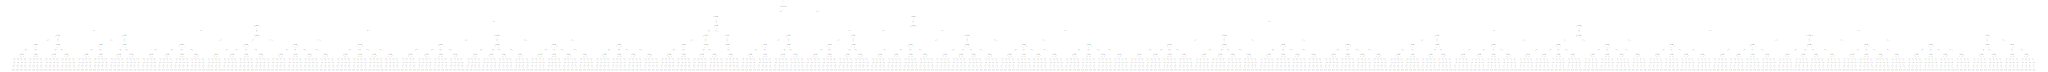

In [4]:
# A .svg primero y luego a visualización en Colab
arr.sum().visualize(filename='grafo_large.svg')

## <font color='blue'>__⚡ Comparación de rendimiento: NumPy vs Dask__</font>

Una de las principales motivaciones para usar Dask es mejorar el rendimiento en operaciones sobre grandes volúmenes de datos. Aunque NumPy es altamente optimizado, su ejecución es secuencial y depende de que los datos quepan en memoria. Dask permite paralelizar y escalar estas operaciones a través de múltiples núcleos o máquinas.

<font color='red'> IMPORTANTE: Ejecuta esta sección con el visulaizador de recursos abierto</font>

In [6]:
!cat /proc/meminfo | grep MemTotal

MemTotal:       13289424 kB


__Código con Numpy__

In [7]:
import time

# Crear arreglos grandes
size = (15000, 15000)
np_arr1 = np.random.randint(10, size=size)
np_arr2 = np.random.randint(10, size=size)

start = time.time()
resultado_np = (((np_arr1 * 2).T)**2 + np_arr2 + 100).sum(axis=1).mean()
end = time.time()

print(f"Resultado NumPy: {resultado_np:.2f}")
print(f"Tiempo NumPy: {end - start:5.3f} segundos")

Resultado NumPy: 3277605.67
Tiempo NumPy: 4.592 segundos


__Código con Dask__

In [8]:
# Convertir arreglos NumPy a Dask
chunks = (500, 500)
da_arr1 = da.from_array(np_arr1, chunks=chunks)
da_arr2 = da.from_array(np_arr2, chunks=chunks)

start = time.time()
resultado_dask = (((da_arr1 * 2).T)**2 + da_arr2 + 100).sum(axis=1).mean().compute()
end = time.time()

print(f"Resultado NumPy: {resultado_dask:.2f}")
print(f"Tiempo Dask: {end - start:5.3f} segundos")

Resultado NumPy: 3277605.67
Tiempo Dask: 4.855 segundos


Aunque en algunos ejemplos Dask aparece como significativamente más rápido que NumPy, en entornos como Google Colab Pro los tiempos pueden ser similares. Esto se debe a que NumPy está altamente optimizado y no tiene la sobrecarga de planificación que sí tiene Dask. La ventaja de Dask se hace más evidente cuando los datos no caben en memoria, el flujo de trabajo es complejo o se dispone de múltiples núcleos o máquinas para distribuir la carga.

Cuando el tamaño del arreglo supera la capacidad de la memoria disponible, NumPy colapsa el entorno al intentar cargar todo en RAM. En contraste, Dask puede seguir operando de manera estable, ya que ejecuta las tareas por fragmentos (chunks) y no requiere cargar todo el dataset en memoria simultáneamente.

__Importante:__
No está demás eliminar los objetos Numpy o Dask que ya no ocuparemos en nuestro fjo de trabajo.

In [9]:
del np_arr1, np_arr2

In [10]:
del da_arr1, da_arr2

In [11]:
import gc # garbage collector
import kagglehub

# Download latest version
path = kagglehub.dataset_download("city-of-seattle/seattle-library-collection-inventory")

print("Path to dataset files:", path)

gc.collect()

Path to dataset files: /kaggle/input/seattle-library-collection-inventory


276

## <font color='blue'>__🕰️ Dask Delayed: ejecución perezosa y flujos personalizados__</font>

`dask.delayed` permite convertir funciones Python comunes en tareas perezosas que pueden ejecutarse en paralelo. En lugar de trabajar con arreglos o dataframes, este enfoque se basa en componer flujos de tareas arbitrarios.

Ideal para:
- Flujos de trabajo con múltiples pasos interdependientes.
- Cálculos que no son fácilmente vectorizables.
- Casos donde se usan múltiples funciones, archivos u operaciones personalizadas.

In [12]:
from dask import delayed

# Definir funciones normales
@delayed
def tarea_1(x, y):
    return x + y + 2 * x * y

@delayed
def tarea_2(a, b):
    return a**3 - b**3

@delayed
def tarea_3(p, q):
    return p*p + q*q

# Crear listas de entrada
x = [2, 4, 6, 8, 10]
y = [3, 6, 9, 12, 15]

# Encadenar tareas
resultado_parcial = [tarea_3(tarea_1(i, j), tarea_2(i, j)) for i, j in zip(x, y)]
resultado_final = delayed(sum)(resultado_parcial)

# Ejecutar el grafo
print(resultado_final.compute())

7575266


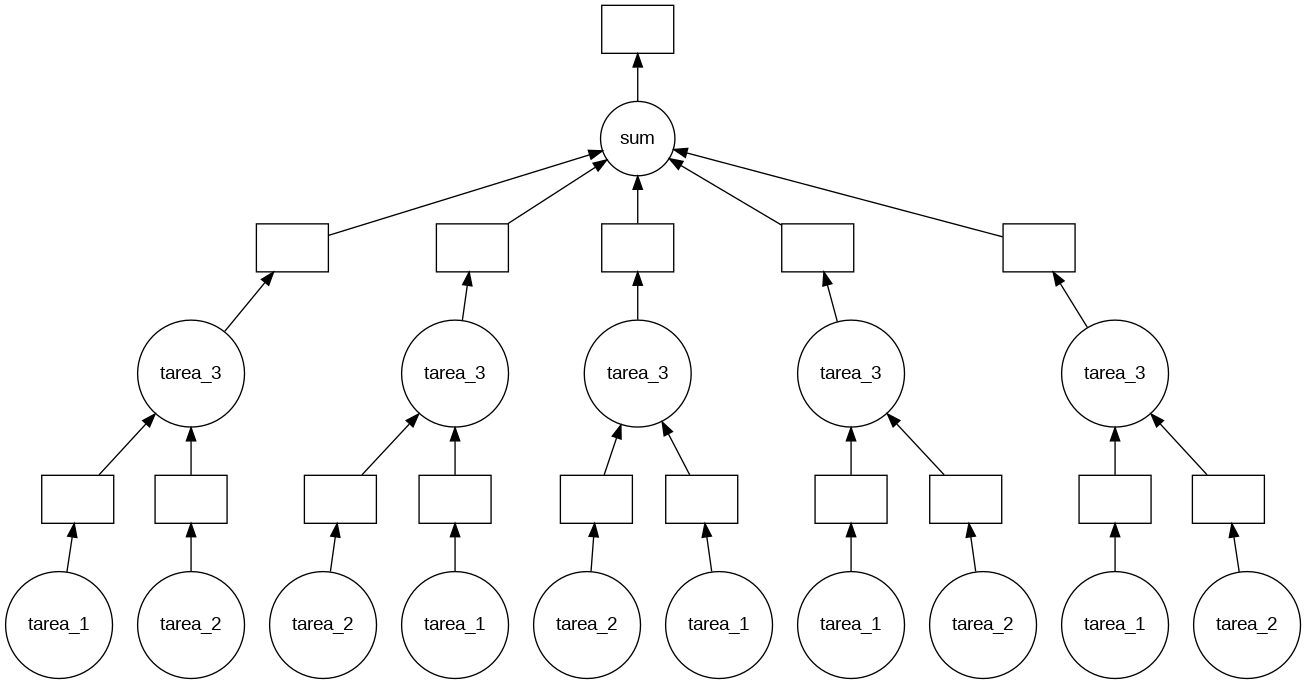

In [15]:
resultado_final.visualize() #rankdir="LR"

__Ventajas de delayed__
- Puedes trabajar con funciones comunes de Python sin cambiar su lógica.
- No necesitas estructuras tipo NumPy o Pandas.
- Ideal para flujos que mezclan distintos tipos de tareas o archivos

### <font color='green'>**Actividad 1**</font>
1.	Crea dos funciones: una que calcule el cuadrado de un número y otra que calcule el factorial (usa `math.factorial`).
2.	Decora ambas funciones con `@delayed` y encadénalas de forma tal de computar el cuadrado de un factorial, sobre una lista de números del 1 al 10.
3.	Visualiza el grafo resultante.
4.	Ejecuta la suma de todos los resultado

In [14]:
# Escribe tu código acá
import math

# Funciones decoradas con @delayed
@delayed
def square(x):
    return x ** 2

@delayed
def factorial(n):
    return math.factorial(n)

# Generación del grafo de tareas
results = []
for n in range(1, 11):
    fact = factorial(n)
    squared_fact = square(fact)
    results.append(squared_fact)

total = delayed(sum)(results)

# Visualización del grafo (genera un archivo graph.svg)
total.visualize(filename='graph')

# Ejecución y resultado final
print(f"Suma total: {total.compute()}")


Suma total: 13301522971817


## <font color='blue'>__📊 Dask DataFrames__</font>


`dask.dataframe` extiende pandas.DataFrame para permitir el análisis de grandes volúmenes de datos tabulares que no caben en memoria. Internamente, divide el dataset en particiones que se procesan en paralelo, replicando muchas de las operaciones conocidas de Pandas.

<p>
<img src="https://docs.dask.org/en/stable/_images/dask-dataframe.svg"
     align="right"
     width="50%"
     alt="Dask DataFrame is composed of pandas DataFrames"/>
</p>

__¿Qué operaciones soporta?__
- Lectura de archivos CSV, Parquet, JSON, entre otros.
- Operaciones como: filter, groupby, apply, merge, sort, etc.
- Computación perezosa (lazy): no se ejecutan hasta llamar `.compute()`.
- Integración con funciones personalizadas o conversiones a NumPy/Pandas.



Utilizaremos el archivo beer_small.csv, que contiene reseñas y atributos de distintas cervezas, junto a datos sobre cervecerías. Este archivo es ideal para practicar operaciones con Dask DataFrames en datasets estructurados.

El archivo incluye las siguientes columnas:
- `brewery_name`: nombre de la cervecería
- `review_overall`, `review_aroma`, `review_appearance`, `review_palate`, `review_taste`: puntajes asignados en distintos aspectos
- `beer_style`: estilo de la cerveza
- `beer_name`: nombre del producto
- `beer_abv`: graduación alcohólica
- `review_profilename`: usuario que hizo la reseña


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from os import chdir
folder = "/content/drive/MyDrive/Cursos/BCH/2024_9_CDP1-BigData"
chdir(folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import dask.dataframe as dd

path_file = f'{folder}/Data/beer_small.csv' #.gz
ddf = dd.read_csv(path_file, blocksize="10MB") #, compression='gzip'

# Mostrar estructura general
print(ddf.head())

   Unnamed: 0  brewery_id                                 brewery_name  \
0      784200         952  Great Dane Pub & Brewing Company (Downtown)   
1     1305265          29                               Anheuser-Busch   
2     1526298          45                             Brooklyn Brewery   
3      450647         590                   New Glarus Brewing Company   
4     1223094           4                     Allagash Brewing Company   

   review_time  review_overall  review_aroma  review_appearance  \
0   1136269921             4.5           4.0                4.0   
1   1234830966             4.5           4.0                3.0   
2   1078599557             4.5           4.0                4.0   
3   1288790879             4.5           4.5                4.5   
4   1295320417             4.5           4.5                4.0   

  review_profilename              beer_style  review_palate  review_taste  \
0           dirtylou            American IPA            4.0           4.0  

In [ ]:
# Obtener número total de filas
print("Total de filas:", len(ddf))

Total de filas: 158661


In [ ]:
# Obtener número total de particiones
print("Número de particiones:", ddf.npartitions)

Número de particiones: 2


Análisis de estilos de cerveza.

In [ ]:
# Contar cantidad de reseñas por estilo de cerveza
estilos = ddf['beer_style'].value_counts().compute()

# Mostrar los 10 estilos más frecuentes
print(estilos.head(10))

beer_style
American Adjunct Lager                 3184
American Amber / Red Ale               4610
American Amber / Red Lager              917
American Barleywine                    2756
American Black Ale                     1100
American Blonde Ale                    1304
American Double / Imperial IPA         8566
American Double / Imperial Pilsner      531
American IPA                          11807
American Malt Liquor                    409
Name: count, dtype: int64[pyarrow]


Calcular promedio general por estilo.

In [ ]:
# Promedio de 'review_overall' por estilo
promedios = ddf.groupby('beer_style')['review_overall'].mean().compute()

# Mostrar estilos mejor evaluados
print(promedios.sort_values(ascending=False).head(10))

beer_style
American Wild Ale                   4.105042
Quadrupel (Quad)                    4.091667
Gueuze                              4.081597
Lambic - Unblended                  4.077982
American Double / Imperial Stout    4.022270
Russian Imperial Stout              4.016069
Weizenbock                          4.014408
American Double / Imperial IPA      4.005954
Flanders Red Ale                    4.003682
Keller Bier / Zwickel Bier          3.994318
Name: review_overall, dtype: float64


### <font color='green'>**Actividad 2**</font>
1.	Filtra las cervezas que tengan $beer\_abv > 8.0$ (alta graduación alcohólica).
2.	Calcula el promedio de review_taste por estilo en ese subconjunto.
3.	Ordena y muestra los 5 estilos mejor evaluados por sabor (`review_taste`).
4. Visualiza el DAG de los pasos anteriores. Qué diferencias ves con los grafos de dask.array?.
5. Elimina objetos grandes y libera memoria.

In [ ]:
# Tu código aqquí ...



<font color='green'>Fin actividad 2</font>

### __Otro ejemplo.__

Usaremos el el archivo `library-collection-inventory.csv`

Este archivo contiene un inventario extenso de ítems bibliográficos de una biblioteca pública, incluyendo información como título, autor, tipo de material, colección, año de publicación, ubicación y cantidad disponible.

Dado su alto volumen de datos, algunas celdas del notebook vienen pre-ejecutadas para optimizar el tiempo de procesamiento en entornos como Google Colab.

In [ ]:
# Si se desea utilizar el archivo, descargar de: https://drive.google.com/file/d/12CfX0NV_56fFnKHIn21s1wyD2huQ8vwc/view?usp=drive_link

path_file2 = f'{folder}/Data/library-collection-inventory.csv' #.gz
# Leer el archivo CSV por particiones de 64MB
ddf = dd.read_csv(path_file2, blocksize="64MB") #, compression='gzip'

# Ver estructura general
print("Número de particiones:", ddf.npartitions)
print(ddf.head())

Número de particiones: 183
    BibNum                                              Title  \
0  3011076  A tale of two friends / adapted by Ellie O'Rya...   
1  2248846  Naruto. Vol. 1, Uzumaki Naruto / story and art...   
2  3209270  Peace, love & Wi-Fi : a ZITS treasury / by Jer...   
3  1907265     The Paris pilgrims : a novel / Clancy Carlile.   
4  1644616  Erotic by nature : a celebration of life, of l...   

                      Author  \
0              O'Ryan, Ellie   
1  Kishimoto, Masashi, 1974-   
2        Scott, Jerry, 1955-   
3     Carlile, Clancy, 1930-   
4                       <NA>   

                                                ISBN PublicationYear  \
0  1481425730, 1481425749, 9781481425735, 9781481...           2014.   
1                                         1569319006    2003, c1999.   
2                          144945867X, 9781449458676           2014.   
3                                         0786706155          c1999.   
4                            

In [ ]:
%%time

########## NO EJECUTAR Toma mnucho tiempo ############

# Uso estimado de memoria en megabytes (1 MB = 1e6 bytes)
memoria_bytes = ddf.memory_usage(deep=True).sum().compute()
memoria_megas = memoria_bytes / 1e6

print(f"Uso estimado de memoria: {memoria_megas:.2f} MB")

Uso estimado de memoria: 14400.62 MB
CPU times: user 7min 23s, sys: 48.3 s, total: 8min 12s
Wall time: 7min 14s


Filtrar y agrupar datos.

In [ ]:
########## NO EJECUTAR Toma mnucho tiempo ############

# Filtrar títulos que contienen la palabra "Python"
filtro = ddf[ddf["Title"].str.contains("Python", na=False)]

# Agrupar por tipo de ítem y contar cuántos hay
conteo = filtro.groupby("ItemType")["Title"].count()

# Ejecutar y mostrar resultado
print(conteo.compute().sort_values(ascending=False))

ItemType
acbk     2544
jcbk     1638
acdvd     716
accd      244
armus      26
acmus      26
armfc      10
Name: Title, dtype: int64


Ahora lo mismo pero con una sitaxis funcional y con medición de tiempo:

In [ ]:
########## NO EJECUTAR Toma mnucho tiempo ############

start = time.time()

conteo = (
    ddf[ddf["Title"].str.contains("Python", na=False)]
    .groupby("ItemType")["Title"]
    .count()
    .compute()
)

print(conteo.sort_values(ascending=False))

elapsed = time.time() - start
minutes = int(elapsed // 60)
seconds = round(elapsed % 60, 2)
print(f"Duración: {minutes} min {seconds} s")

ItemType
acbk     2544
jcbk     1638
acdvd     716
accd      244
armus      26
acmus      26
armfc      10
Name: Title, dtype: int64
Duración: 6 min 32.45 s


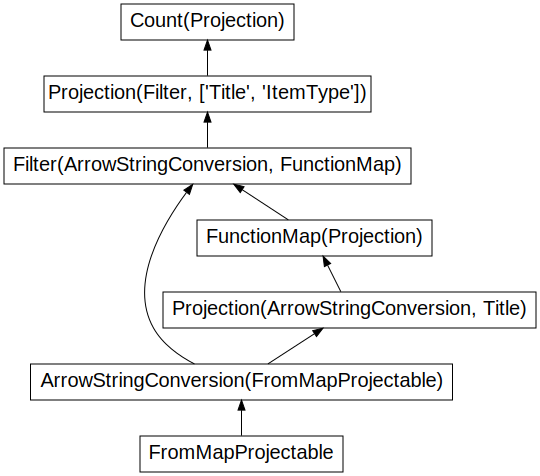

In [ ]:
# Construcción del grafo sin ejecutar la computación
conteo_dask = (
    ddf[ddf["Title"].str.contains("Python", na=False)]
    .groupby("ItemType")["Title"]
    .count()
)

# Visualizar el grafo de tareas
conteo_dask.visualize(filename="grafico_dask.svg")

## <font color='blue'>__🧺 Dask Bags: procesamiento flexible de datos semi-estructurados__</font>

dask.bag es el componente de Dask diseñado para trabajar con datos no estructurados o semi-estructurados, como listas de diccionarios, archivos JSON, registros de texto, o líneas de logs.

Es similar a una lista de Python, pero dividida en particiones y con operaciones ejecutadas en paralelo. Se inspira en el modelo MapReduce y permite operaciones de filtrado, mapeo y reducción de datos.

__¿Cuándo usar dask.bag?__

Ideal para:
- Archivos JSON grandes
- Texto línea por línea (ej. logs)
- Registros sin estructura fija
- Transformaciones personalizadas con map, filter, groupby

No usar si los datos ya tienen estructura tabular (usa dask.dataframe en ese caso).

__Ejemplo básico:__

Vamos a trabajar con los títulos (Title) del dataset library-collection-inventory.csv, extrayendo palabras clave desde una Bag.

In [ ]:
import dask.bag as db

# Convertir la columna 'Title' a una Bag
titles = ddf["Title"].dropna().to_bag()

# Mostrar algunas líneas
print(titles.take(5))

("A tale of two friends / adapted by Ellie O'Ryan ; illustrated by Tom Caulfield, Frederick Gardner, Megan Petasky, and Allen Tam.", 'Naruto. Vol. 1, Uzumaki Naruto / story and art by Masashi Kishimoto ; [English adaptation by Jo Duffy].', 'Peace, love & Wi-Fi : a ZITS treasury / by Jerry Scott and Jim Borgman.', 'The Paris pilgrims : a novel / Clancy Carlile.', 'Erotic by nature : a celebration of life, of love, and of our wonderful bodies / edited by David Steinberg.')


__Operaciones con Bag__

In [ ]:
# Separar cada título en palabras
palabras = titles.map(lambda x: x.split(" "))

# Aplanar la lista de listas (tokenize)
palabras_planas = palabras.flatten()

# Contar palabras
frecuencia = palabras_planas.frequencies()

# Obtener las 10 palabras más comunes (no computado aún)
top10 = frecuencia.topk(10, key=lambda x: x[1])

# Ejecutar y mostrar el resultado
print(top10)

dask.bag<topk-aggregate, npartitions=1>


Lo anterior significa que lo que tienes es un objeto dask.bag.Bag perezoso, que representa una operación pendiente llamada topk-aggregate, con 1 partición.

En Dask Bag, las operaciones no se ejecutan inmediatamente. Al igual que en dask.array o dask.dataframe, el objeto solo representa un grafo de tareas aún no computado.

In [ ]:
%%time
########## NO EJECUTAR Toma mnucho tiempo ############

# Ejecutar y mostrar el resultado
print(top10.compute())

KeyboardInterrupt: 

Salida experada:

    [('/', 32045747), ('by', 20748790), (';', 20125662), ('the', 13728849), (':', 13042344), ('and', 12654015), ('of', 11078649), ('The', 7414291), ('a', 6345910), ('in', 3760667)]
CPU times: user 1min 20s, sys: 5.15 s, total: 1min 26s
Wall time: 12min 19s

### <font color='green'>**Actividad 3**</font>
Objetivo: Encontrar los estilos de cerveza con alta graduación alcohólica (beer_abv > 8.0) mejor evaluados según el promedio de review_taste, y visualizar el flujo de tareas de Dask.

In [ ]:
# Tu código aquí ...



<font color='green'>Fin actividad 3</font>

## <font color='blue'>__⚙️ Uso de Dask Client para diagnósticos y control__</font>
Para obtener mayor visibilidad sobre la ejecución de tareas, recursos utilizados y configuración del entorno de cómputo, es recomendable iniciar un objeto Client desde dask.distributed.

In [ ]:
from dask.distributed import Client

client = Client()
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-t_e8eann', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-gayzzqm3', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-h5kewdih', purging
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:37333
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40337'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32777'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:35899 name: 1
INFO:distributed.scheduler:Starting worke

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37333,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:35015,Total threads: 1
Dashboard: http://127.0.0.1:40815/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:40337,


Esto crea un planificador local que administra los workers y permite:
- Monitorear el uso de CPU y memoria
- Visualizar las tareas ejecutándose en paralelo
- Obtener información sobre el rendimiento del grafo de tareas

### __Importante:  Limitación en Google Colab__

Google Colab no permite abrir el dashboard visual de Dask (usualmente accesible vía localhost:8787). Sin embargo, puedes seguir utilizando Client para obtener información programática:

In [ ]:
client.nthreads()         # Núcleos por worker

{'tcp://127.0.0.1:35015': 1, 'tcp://127.0.0.1:35899': 1}

In [ ]:
client.scheduler_info()   # Información del planificador

{'type': 'Scheduler',
 'id': 'Scheduler-3d34b82c-4951-4593-a522-d7ea8f23c7b6',
 'address': 'tcp://127.0.0.1:37333',
 'services': {'dashboard': 8787},
 'started': 1746668894.6397698,
 'workers': {'tcp://127.0.0.1:35015': {'type': 'Worker',
   'id': 0,
   'host': '127.0.0.1',
   'resources': {},
   'local_directory': '/tmp/dask-scratch-space/worker-wnbwfboq',
   'name': 0,
   'nthreads': 1,
   'memory_limit': 6804185088,
   'last_seen': 1746668968.365965,
   'services': {'dashboard': 40815},
   'metrics': {'task_counts': {},
    'bandwidth': {'total': 100000000, 'workers': {}, 'types': {}},
    'digests_total_since_heartbeat': {'tick-duration': 0.4989902973175049,
     'latency': 0.0028858184814453125},
    'managed_bytes': 0,
    'spilled_bytes': {'memory': 0, 'disk': 0},
    'transfer': {'incoming_bytes': 0,
     'incoming_count': 0,
     'incoming_count_total': 0,
     'outgoing_bytes': 0,
     'outgoing_count': 0,
     'outgoing_count_total': 0},
    'event_loop_interval': 0.019974751472473143,
    'cpu': 4.0,
    'memory': 150298624,
    'time': 1746668967.863099,
    'host_net_io': {'read_bps': 21502.77789876559,
     'write_bps': 21502.77789876559},
    'host_disk_io': {'read_bps': 0.0, 'write_bps': 2177732.9076695917},
    'num_fds': 19},
   'status': 'running',
   'nanny': 'tcp://127.0.0.1:40337'},
  'tcp://127.0.0.1:35899': {'type': 'Worker',
   'id': 1,
   'host': '127.0.0.1',
   'resources': {},
   'local_directory': '/tmp/dask-scratch-space/worker-xpx7gevg',
   'name': 1,
   'nthreads': 1,
   'memory_limit': 6804185088,
   'last_seen': 1746668968.3565278,
   'services': {'dashboard': 42451},
   'metrics': {'task_counts': {},
    'bandwidth': {'total': 100000000, 'workers': {}, 'types': {}},
    'digests_total_since_heartbeat': {'tick-duration': 0.5188274383544922,
     'latency': 0.002875804901123047},
    'managed_bytes': 0,
    'spilled_bytes': {'memory': 0, 'disk': 0},
    'transfer': {'incoming_bytes': 0,
     'incoming_count': 0,
     'incoming_count_total': 0,
     'outgoing_bytes': 0,
     'outgoing_count': 0,
     'outgoing_count_total': 0},
    'event_loop_interval': 0.020012607574462892,
    'cpu': 2.0,
    'memory': 149901312,
    'time': 1746668967.8546453,
    'host_net_io': {'read_bps': 21522.026985290748,
     'write_bps': 21522.026985290748},
    'host_disk_io': {'read_bps': 0.0, 'write_bps': 2179682.3938878733},
    'num_fds': 19},
   'status': 'running',
   'nanny': 'tcp://127.0.0.1:32777'}}}

A continuación un ejemplo que demuestra el uso práctico del Dask Client, combinando inicialización, diagnóstico y ejecución de una tarea para visualizar cómo se reparte el trabajo entre workers y medir el uso de recursos.


In [ ]:
import dask.array as da
import time

# Crear un arreglo grande dividido en chunks
arr = da.random.random(size=(10000, 10000), chunks=(1000, 1000))

# Visualizar el grafo de tareas
arr_sum = arr.sum()
arr_sum.visualize(rankdir="LR")

Ejecutar la tarea y medir tiempo

In [ ]:
start = time.time()
resultado = arr_sum.compute()
elapsed = time.time() - start

print(f"Resultado: {resultado:.4f}")
print(f"Duración: {int(elapsed // 60)} min {round(elapsed % 60, 2)} s")

Resultado: 50002521.8389
Duración: 0 min 2.83 s


Verificar distribución de recursos.

In [ ]:
# Información general del scheduler
info = client.scheduler_info()

# Mostrar workers activos
print("Workers conectados:")
for addr, worker in info["workers"].items():
    nthreads = worker["nthreads"]
    mem = worker["memory_limit"] / 1e9
    print(f"- {addr}: {nthreads} hilos, {mem:.2f} GB límite de memoria")

Workers conectados:
- tcp://127.0.0.1:35015: 1 hilos, 6.80 GB límite de memoria
- tcp://127.0.0.1:35899: 1 hilos, 6.80 GB límite de memoria


### __Ejemplo con y sin el uso del cluster__

In [ ]:
import time
from dask import delayed, compute
import numpy as np

@delayed
def simulacion_pesada_paralela(x):
    time.sleep(1.5)  # Simula una tarea pesada
    return x**2 + np.sin(x)

def simulacion_pesada_secuencia(x):
    time.sleep(1.5)  # Simula una tarea pesada
    return x**2 + np.sin(x)

Tareas diferidas con Dask.

In [ ]:
valores = np.linspace(0, 10, 8)  # 8 valores de prueba

# Crear una lista de tareas diferidas
tareas = [simulacion_pesada_paralela(x) for x in valores]

Ejecución sin Dask.

In [ ]:
%%time
resultados_s = []
for x in valores:
    r = simulacion_pesada_secuencia(x)
    resultados_s.append(r)

CPU times: user 548 ms, sys: 66.8 ms, total: 614 ms
Wall time: 12 s


In [ ]:
print(*resultados_s)

0.0 3.0307194029027364 8.443894705636806 17.456999994464727 32.11435593610364 51.77803657865803 74.22287448254167 99.45597888911063


Ejecución con Dask.

In [ ]:
%%time
resultados_p = compute(*tareas)

CPU times: user 314 ms, sys: 40.4 ms, total: 355 ms
Wall time: 6.03 s


In [ ]:
print(*resultados_p)

0.0 3.0307194029027364 8.443894705636806 17.456999994464727 32.11435593610364 51.77803657865803 74.22287448254167 99.45597888911063
